<center><b>Análisis Explatorio de Datos (EDA)<b><center>

In [1]:
# Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>EDA PlayTimeGenre<b>

In [2]:
# Carga de dataset PlayTimeGenre
df_PlayTimeGenre = pd.read_parquet('..\\Funciones\\datasets\\PlayTimeGenre.parquet')

In [3]:
df_PlayTimeGenre.head()

,genres,release_year,Sum_playtime_forever
0,Action,1997.0,271013
1,Indie,1997.0,64814
2,Racing,1997.0,9319
3,Action,1998.0,2809535
4,Strategy,2006.0,3683704


In [4]:
df_PlayTimeGenre.describe()

,release_year,Sum_playtime_forever
count,341.000000,3.410000e+02
mean,2005.888563,2.461815e+07
std,8.980987,7.946313e+07
min,1983.000000,0.000000e+00
25%,1999.000000,6.419000e+03
50%,2008.000000,1.402710e+05
75%,2013.000000,6.015794e+06
max,2018.000000,1.021523e+09


In [5]:
df_PlayTimeGenre.duplicated().sum()

0

In [6]:
df_PlayTimeGenre.isnull().sum()

genres                  0
release_year            0
Sum_playtime_forever    0
dtype: int64

<Axes: xlabel='count', ylabel='genres'>

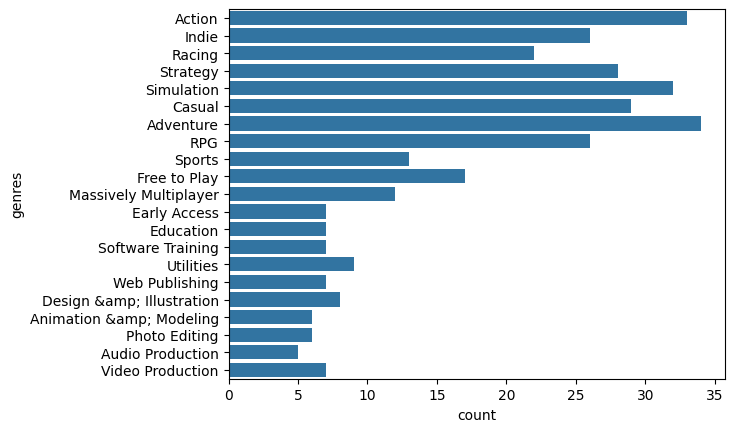

In [7]:
sns.countplot(df_PlayTimeGenre['genres'])
# Hay una mayor cantidad de datos de los generos Action, Adventure y Simulation. Podria significar que faltan datos sobre los otros generos
#  a lo largo de los años o que simplemente no fueron desarrollados. 
# Esto implica una mayor cantidad de data respecto a otros generos y por ende podria significar una mayor cantidad de horas de juegos 
# en estos generos que tergiversen los resultados.

[Text(0.5, 0, 'release_year'), Text(0, 0.5, 'Sum_playtime_forever')]

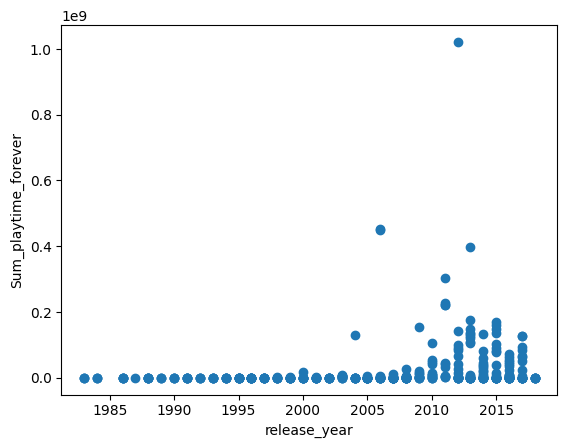

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_PlayTimeGenre['release_year'],df_PlayTimeGenre['Sum_playtime_forever'])
ax.set(xlabel='release_year', ylabel='Sum_playtime_forever')
# Se puede apreciar mayor tiempo de juego a partir del año 2005, habiendo una tendencia clara a partir del año 2010


In [9]:
df_PlayTimeGenre.head()

,genres,release_year,Sum_playtime_forever
0,Action,1997.0,271013
1,Indie,1997.0,64814
2,Racing,1997.0,9319
3,Action,1998.0,2809535
4,Strategy,2006.0,3683704


In [10]:
# Se obtiene las horas acumuladas a lo largo de los años por genero
df_PlayTimeGenre_acum = df_PlayTimeGenre.copy()
df_PlayTimeGenre_acum['Horas_Acum'] = df_PlayTimeGenre_acum.groupby(['genres'])['Sum_playtime_forever'].transform('sum')
df_PlayTimeGenre_acum.drop(columns=['Sum_playtime_forever','release_year'],inplace=True)
df_PlayTimeGenre_acum.drop_duplicates(subset=['genres'],inplace=True)
df_PlayTimeGenre_acum.reset_index(drop=True,inplace=True)
df_PlayTimeGenre_acum.head()

,genres,Horas_Acum
0,Action,2695424215
1,Indie,1379142637
2,Racing,18561256
3,Strategy,448207342
4,Simulation,830578013


[Text(0.5, 0, 'Horas_Acum'), Text(0, 0.5, 'Generos')]

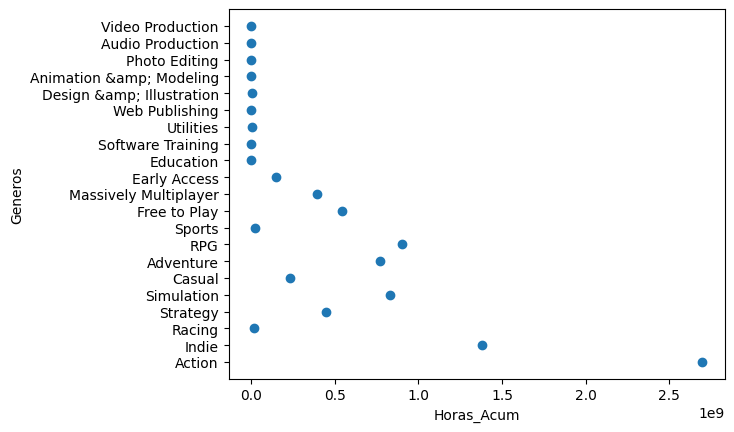

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_PlayTimeGenre_acum['Horas_Acum'],df_PlayTimeGenre_acum['genres'])
ax.set(xlabel='Horas_Acum', ylabel='Generos')
# Se puede apreciar mayor tiempo de juego a partir del año 2005, habiendo una tendencia clara a partir del año 2010

El genero con mayores cantidades de tiempo fueron Action, Indie y RPG. Inicialmente, se aprecio que se tenia una mayor cantidad de data de los generos Action, Adventure y Simulation, por lo cual no sorprende que Action lidere en los tiempos; sin embargo Indie es la sorpresa ya que a pesar de tener menor cantidad de data se encuentra en 2do lugar tiempo de juego.

<b>EDA UserForGenre

In [2]:
# Carga de dataset UserForGenre
df_UserForGenre = pd.read_parquet('..\\Funciones\\datasets\\UserForGenre.parquet')

In [3]:
df_UserForGenre.head()

,genres,user_id,release_year,Sum_playtime_year
0,Action,UTNerd24,1997.0,2386
1,Action,I_DID_911_JUST_SAYING,1997.0,0
2,Action,76561197962104795,1997.0,0
3,Action,r3ap3r78,1997.0,0
4,Action,saint556,1997.0,206


Analisando usuarios y generos

In [5]:
genre_users = df_UserForGenre.copy()
genre_users.drop(columns=['release_year','Sum_playtime_year'],inplace=True)
genre_users.drop_duplicates(subset=['genres','user_id'],inplace=True)
genre_users.head()

,genres,user_id
0,Action,UTNerd24
1,Action,I_DID_911_JUST_SAYING
2,Action,76561197962104795
3,Action,r3ap3r78
4,Action,saint556


<Axes: xlabel='count', ylabel='genres'>

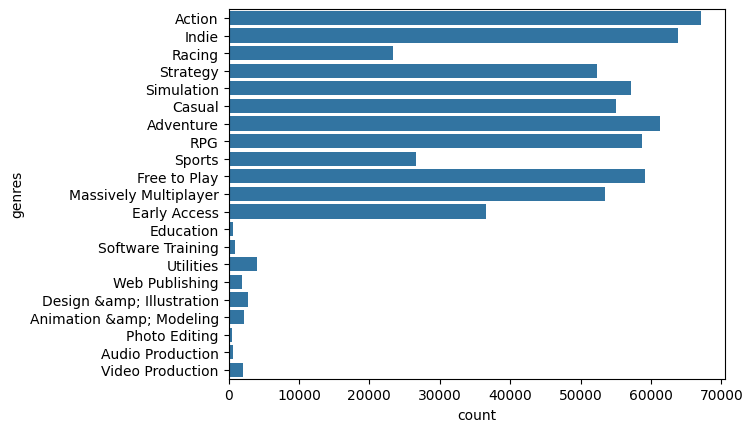

In [7]:
sns.countplot(genre_users['genres'])
# Se aprecia una concentracion de jugadores en 8 generos(Action, Indie, Adventure, RPG, Free to Play y Simulation). 
# En los videojuegos educativos hay pocos usuarios.

Analisis de usuarios

In [3]:
df_UserForGenre.head()

,genres,user_id,release_year,Sum_playtime_year
0,Action,UTNerd24,1997.0,2386
1,Action,I_DID_911_JUST_SAYING,1997.0,0
2,Action,76561197962104795,1997.0,0
3,Action,r3ap3r78,1997.0,0
4,Action,saint556,1997.0,206


In [4]:
df_UserForGenre.describe()

,release_year,Sum_playtime_year
count,1.582397e+07,1.582397e+07
mean,2.012577e+03,1.208024e+04
std,3.550427e+00,3.705529e+04
min,1.983000e+03,0.000000e+00
25%,2.011000e+03,3.600000e+02
50%,2.013000e+03,2.544000e+03
75%,2.015000e+03,9.882000e+03
max,2.018000e+03,1.550174e+06


In [5]:
# Analisis de los usuarios sin importar el genero
users = df_UserForGenre.copy()
users.drop(columns=['genres','release_year'],inplace=True)
users['Horas_Acum'] = users.groupby(['user_id'])['Sum_playtime_year'].transform('sum')
users.drop(columns=['Sum_playtime_year'],inplace=True)
users.drop_duplicates(subset=['user_id'],inplace=True)
users.sort_values(['Horas_Acum'],inplace=True,ascending=False)
users.reset_index(drop=True,inplace=True)

# Se muestra en orden los usuarios que tienen mayor tiempo de juego. Liderado por phrostb
users

,user_id,Horas_Acum
0,phrostb,3703111944
1,REBAS_AS_F-T,3543013076
2,Steamified,3542257424
3,piepai,2702169704
4,thugnificent,2647827100
...,...,...
68035,76561198103566623,0
68036,abnertf21,0
68037,76561198149408365,0
68038,76561198091028106,0


In [52]:
# Funcion que indica los juegos mas jugados por el jugador
def genres_users(user):
    genre_phrostb =  df_UserForGenre['genres'][df_UserForGenre['user_id'] == user]
    genre_phrostb.drop_duplicates(inplace=True)
    return genre_phrostb

In [56]:
print(genres_users('phrostb'))

15                            Action
190                            Indie
365                           Racing
16565                       Strategy
73376                     Simulation
203012                           RPG
203823                     Adventure
244472                        Casual
419383                        Sports
839043                  Free to Play
845340         Massively Multiplayer
2617633                 Early Access
3041921     Animation &amp; Modeling
3774892                    Utilities
4189811                    Education
4371958    Design &amp; Illustration
4689848               Web Publishing
5311836             Audio Production
5312508                Photo Editing
5313180             Video Production
5558358            Software Training
Name: genres, dtype: object


In [57]:
print(genres_users('REBAS_AS_F-T'))

3797                           Action
40528                           Indie
83829                      Simulation
203092                            RPG
212930                      Adventure
255499                         Racing
299712                       Strategy
388504                         Casual
812892                         Sports
840769                   Free to Play
847066          Massively Multiplayer
2681751                  Early Access
5311968              Audio Production
5312304     Design &amp; Illustration
5312640                 Photo Editing
5312976                     Utilities
5313312              Video Production
5313648                Web Publishing
11264995     Animation &amp; Modeling
Name: genres, dtype: object


In [58]:
print(genres_users('Steamified'))

3531                           Action
16620                        Strategy
18348                           Indie
82682                      Simulation
200856                      Adventure
201070                            RPG
201816                         Racing
251177                         Casual
812850                         Sports
1265531                  Free to Play
1266103         Massively Multiplayer
2617801                  Early Access
5022892      Animation &amp; Modeling
5023792              Video Production
7584687                     Utilities
10889028               Web Publishing
12543577    Design &amp; Illustration
Name: genres, dtype: object


En el top 3 de usuarios con mayor cantidad de tiempo jugada (phrostb, REBAS_AS_F-T,Steamified) es liderado por Action y seguido por Indie

<b>EDA SentimentRecommend

In [7]:
df_SentimentRecommend = pd.read_parquet('..\\Funciones\\datasets\\SentimentRecommend.parquet')

In [16]:
df_SentimentRecommend.head()

,item_id,year_posted,sentiment_analysis,Recomends_times
0,12210,2014,Negative,3
1,630,2013,Negative,1
2,33950,2014,Negative,1
3,204080,2014,Negative,1
4,322920,2015,Negative,1


<Axes: xlabel='count', ylabel='sentiment_analysis'>

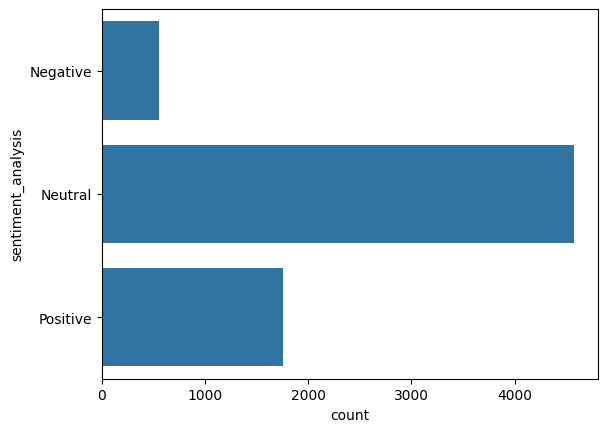

In [12]:
sns.countplot(df_SentimentRecommend['sentiment_analysis'])
# Se presenta una mayor cantidad de comentarios neutrales y luego positivos

In [30]:
recomend_year = df_SentimentRecommend.copy()
recomend_year.head()
recomend_year.drop(columns=['item_id','sentiment_analysis'],inplace=True)
recomend_year['Recomend_times_year'] = recomend_year.groupby(['year_posted'])['Recomends_times'].transform('sum')
recomend_year.drop(columns=['Recomends_times'],inplace=True)
recomend_year.drop_duplicates(subset=['year_posted'],inplace=True)
recomend_year.sort_values(['year_posted'],inplace=True)
recomend_year.reset_index(drop=True,inplace=True)
# En el año 2014 y 2015hubo mayores recomendaciones en general (4 veces del resto de años)
recomend_year

,year_posted,Recomend_times_year
0,2010,66
1,2011,532
2,2012,1215
3,2013,6792
4,2014,22111
5,2015,18470


In [38]:
recomend_item = df_SentimentRecommend.copy()
recomend_item.head()
recomend_item.drop(columns=['year_posted','sentiment_analysis'],inplace=True)
recomend_item['Recomend_times_item'] = recomend_item.groupby(['item_id'])['Recomends_times'].transform('sum')
recomend_item.drop(columns=['Recomends_times'],inplace=True)
recomend_item.drop_duplicates(subset=['item_id'],inplace=True)
recomend_item.sort_values(['Recomend_times_item'],inplace=True,ascending= False)
recomend_item.reset_index(drop=True,inplace=True)

# los item_id's mas recomendados fueron el 440 y 730
recomend_item.head()

,item_id,Recomend_times_item
0,440,3436
1,730,3017
2,4000,1575
3,570,1417
4,218620,1012
